### HOME PRICE PREDICTION

In this project, I have predicted the prices of the houses in the Bangalore city. The prices in the dataset varies with respect to the region, so considering all the varying factors in the dataset I had to train a ML model using a few techniques to find out the best model and use it to the train the model to predict the prices accurately.

Data is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

### Firstly, we read the dataset and load it in the df variable.

In [1]:
import pandas as pd
df = pd.read_csv("banglore.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.shape

(13320, 9)

In [3]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

#### Drop the columns which are not required and are not important

In [4]:
df1 = df.drop(['area_type','availability','society'],axis='columns')
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Data Cleaning i.e handling the missing values and the null values.

In [5]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df1['balcony'] = df1['balcony'].fillna(0.0)

In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [8]:
df2 = df1.copy()
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [9]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## FEATURE ENGINEERING
Add new feature(integer) for BHK(Bedrooms Hall Kitchen)

In [11]:
def size_split(x):
    val = x.split(" ")
    return val[0]

In [12]:
df2['BHK'] = df2['size'].apply(size_split)
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
df2['BHK'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

#### Exploring total_sqft feature

In [14]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Above shows that total_sqft can be a range (e.g. 1133-1384). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [15]:
def sqft(x):
    val = x.split("-")
    if (len(val)>1):
        return ((float(val[0])+float(val[1]))/2)
    try:
        return float(x)
    except:
        return None

In [16]:
df2['total_sqft'] = df2['total_sqft'].apply(sqft)
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [17]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [18]:
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [19]:
df2 = df2.dropna()

In [20]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [21]:
df3 = df2.drop(['size'],axis='columns')
df3.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [22]:
df3.shape

(13200, 6)

#### Let's check if all the numerical columns has float datatypes.

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df3[~df3['balcony'].apply(is_float)].head()

,location,total_sqft,bath,balcony,price,BHK


In [25]:
df3[~df3['bath'].apply(is_float)].head()

,location,total_sqft,bath,balcony,price,BHK


In [26]:
df3[~df3['price'].apply(is_float)].head()

,location,total_sqft,bath,balcony,price,BHK


In [27]:
location_count = df3.groupby('location')['location'].agg('count')

In [28]:
location_count

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1298, dtype: int64

##  DIMESTIONALITY REDUCTION
#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns. Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations. Hence, here we can see there are lot of locations which are appearing just once in our dataset. So, we can all set all the columns which are appearing atmost 10 times as "others".

In [29]:
len(df3['location'])

13200

In [30]:
len(df3['location'].unique())

1298

In [31]:
loc_less_than_10 = location_count[location_count<=10]

In [32]:
def locs(x):
    if x in loc_less_than_10:
        return 'other'
    return x

In [33]:
df3['location'] = df3['location'].apply(locs)
df3.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [34]:
len(df3['location'])

13200

In [35]:
len(df3['location'].unique())

241

#### Now we have in total only 241 locations.

In [36]:
def str_to_num(x):
    return int(x)

In [37]:
df3['BHK'] = df3['BHK'].apply(str_to_num)

In [38]:
df3.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [39]:
df4 = df3.copy()

In [40]:
df4.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


## OUTLIER REMOVAL USING BUSINESS LOGIC
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.

In [41]:
df4 = df4[df4['total_sqft']/df4['BHK']>300]

In [42]:
df4.shape

(12274, 6)

In [43]:
df5 = df4.copy()
df5.shape

(12274, 6)

## FEATURE ENGINEERING
#### Add new feature called "price_per_sqft"

In [44]:
import numpy as np
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


## Data Visualisation
#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [45]:
import matplotlib.pyplot as plt

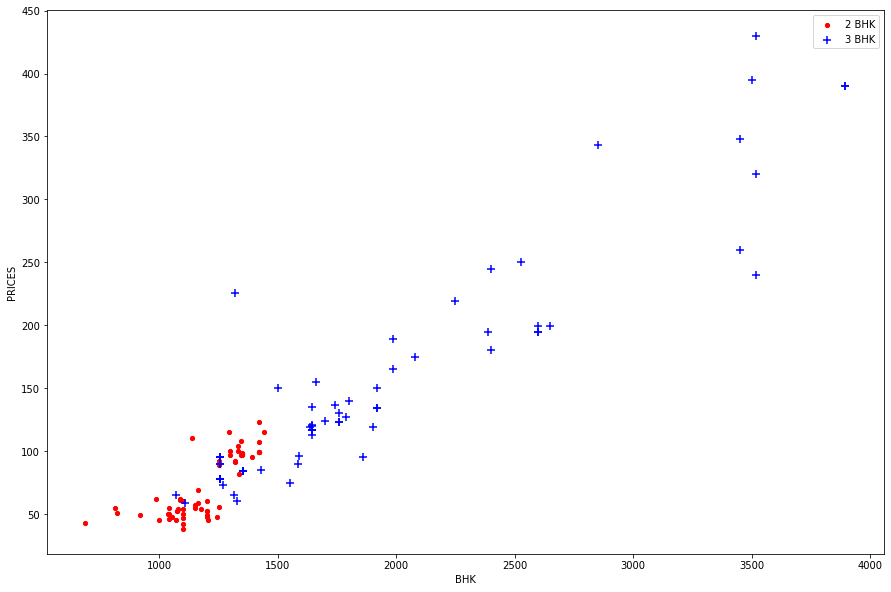

In [46]:
%matplotlib inline
def lets_visualise(df,location):
    bhk2 = df[(df['location']==location) & (df['BHK']==2)]
    bhk3 = df[(df['location']==location) & (df['BHK']==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],marker='.',c='red',s=70,label='2 BHK')
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+',c='blue',s=70,label='3 BHK')
    plt.xlabel("BHK")
    plt.ylabel("PRICES")
    plt.legend()
    
lets_visualise(df5,'Hebbal')

#### Here, in the visualisation we can see there are some houses which are 2 bhk and 3 bhk have the same prices for the same region. Hence we can say that these houses should be treated as outliers.

In [47]:
df5['price_per_sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 1,76,470 rs/sqft, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation.

In [48]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for name, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        sd = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-sd)) & (subdf['price_per_sqft']<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [49]:
df6 = remove_pps_outliers(df5)
df6.shape

(10017, 7)

#### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    }   
}
#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
#                 print(exclude_indices)
    return df.drop(exclude_indices,axis='index')



In [51]:
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7165, 7)

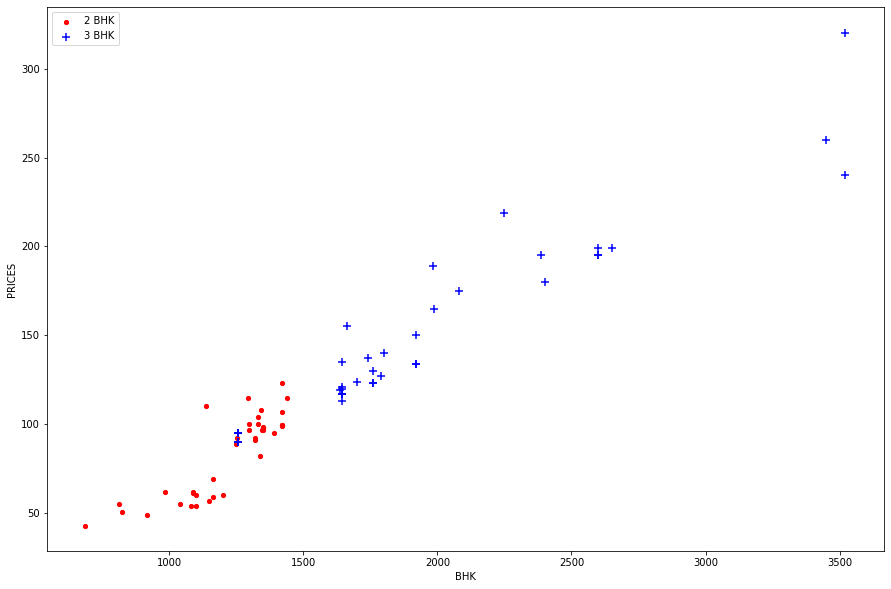

In [52]:
lets_visualise(df7,'Hebbal')

### OUTLIER REMOVAL USING BATHROOM FEATURE
#### It is unusual to have 2 more bathrooms than number of bedrooms in a home.
#### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [53]:
df7 = df7[df7['bath']<df7['BHK']+2]

In [54]:
df7 = df7.drop(['price_per_sqft'],axis='columns')

In [55]:
df7.shape

(7089, 6)

In [56]:
df7.head(25)

,location,total_sqft,bath,balcony,price,BHK
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2
6,Devarachikkanahalli,1130.0,2.0,2.0,36.0,2
7,Devarachikkanahalli,1417.0,2.0,2.0,76.0,3
8,Devarachikkanahalli,1230.0,2.0,1.0,58.0,2
9,Devarachikkanahalli,1705.0,3.0,2.0,75.0,3
10,Devarachikkanahalli,1116.0,2.0,1.0,47.0,2


In [57]:
df7.location.nunique()

241

In [58]:
df7.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'BHK'], dtype='object')

### Use OneHotEncoding for location column.

In [59]:
dummies = pd.get_dummies(df7['location'])

In [60]:
df8 = pd.concat([df7,dummies],axis='columns')

In [61]:
df8.head()

,location,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Building a Machine Learning model now....

In [62]:
df9 = df8.drop(['location','other'],axis='columns')

In [63]:
df9.head()

,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X = df9.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,balcony,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y = df9['price']
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [68]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
model.score(X_test,y_test)

0.8087115627547524

In [70]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82232312, 0.87741125, 0.81575985, 0.84974807, 0.78774058])

#### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose.

## Find best model using GridSearchCV.

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [72]:
def best_model(X,y):
    model_params = {
        'Linear Regression' : {
        'model' : LinearRegression(),
        'params' : {
            'normalize' : [True,False],
            'n_jobs' : [1,-1],
            }
        },
        'Lasso Regression' : {
            'model' : Lasso(),
            'params' : {
                'normalize' : [True,False],
                'max_iter' : [300,500,800,1000],
                'selection' : ['cyclic','random']
            }
        },
        'Ridge Regrression' : {
            'model' : Ridge(),
            'params' : {
                'normalize' : [True,False],
                'max_iter' : [300,500,800,1000],
                'solver' : [ "svd", "cholesky", "lsqr", "sparse_cg", "saga"]
            }
        },
        'DecisionTreeRegressor' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ["mse", "friedman_mse", "mae"],
                'splitter' : ["best"]
            }
        },
        'RandomForestRegressor' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators' : [10,20,30,40],
                'criterion' : ["mse", "mae"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,mp in model_params.items():
        gs = GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
        'model' : model_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })
    df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
    return df

In [73]:
best_model(X,y)

,model,best_score,best_params
0,Linear Regression,0.830597,"{'n_jobs': 1, 'normalize': False}"
1,Lasso Regression,0.699144,"{'max_iter': 300, 'normalize': False, 'selecti..."
2,Ridge Regrression,0.827463,"{'max_iter': 300, 'normalize': False, 'solver'..."
3,DecisionTreeRegressor,0.757341,"{'criterion': 'mse', 'splitter': 'best'}"
4,RandomForestRegressor,0.802292,"{'criterion': 'mse', 'n_estimators': 30}"


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

#### As this model takes a lot of time to train I will save it in a file, so that I don't have to train it everytime I check my code. I will just use the joblib library to save it in a file and load it whenever i need to train my model to save my time.

In [73]:
from sklearn.externals import joblib
joblib.dump(model,'model(BangaloreHomePrices).pkl')

C:\Users\DEEP\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model(BangaloreHomePrices).pkl']

In [74]:
model = joblib.load('model(BangaloreHomePrices).pkl')

#### Test the model for few properties...

In [75]:
def lets_predict(location,bath,balcony,BHK,total_sqft):
    loc = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = balcony
    x[3] = BHK
    if loc>=0:
        x[loc] = 1
        
    return model.predict([x])

In [76]:
lets_predict('Electronic City Phase II',2,1,2,1056.0)

array([34.88488373])

In [77]:
lets_predict('Uttarahalli',2,3,3,1440.0)

array([66.8872842])

In [81]:
y_predicted = model.predict(X_test)
y_predicted

array([ 84.8829217 ,  35.63347378, 123.53368769, ..., 102.91477293,
        62.60433667,  69.32999223])

In [82]:
df_final = pd.DataFrame({'y_test':y_test,'y_predicted':y_predicted})
df_final.head()

,y_test,y_predicted
809,95.00,84.882922
2207,30.75,35.633474
381,121.00,123.533688
3089,76.00,87.729653
6618,55.00,51.745869


### Hence we have predicted the home prices in Bangalore.